## Exploratory Data Analysis

### Introduction About the Data :

The dataset generated for diabetes prediction purposes contains a range of features associated with diabetes risk factors. These features may include variables such as blood sugar levels, body mass index (BMI), age, family history, and other relevant health indicators. Each set of feature values is accompanied by a diagnosis label that indicates whether the individual has diabetes or not.

Here is the details of the dataset features:

* `Pregnancies` : Number of pregnancies the individual has had.
* `Glucose` : Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.
* `BloodPressure` : Diastolic blood pressure (mm Hg).
* `SkinThickness` : Thickness of skinfold (mm) at the triceps.
* `Insulin` : 2-Hour serum insulin (mu U/ml).
* `BMI` : 2-Hour serum insulin (mu U/ml).
* `DiabetesPedigreeFunction` : Diabetes pedigree function, which represents the likelihood of diabetes based on family history.
* `Age` : Age of the individual (years).

Target variable:
* `Diagnosis`: Binary label indicating whether the individual has diabetes (1) or not (0).

Dataset Source Link :
[https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction](https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction)

In [1]:
import os
os.chdir('../../')
%pwd

'/home/utpal108/dev/Upwork/Projects/Diabetic-Retinopathy-Prediction'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from diabeticRetinopathy.constants import *
from diabeticRetinopathy.utils import read_yaml

In [3]:
config = read_yaml(CONFIG_FILE_PATH)

2024-04-18 10:34:28,710 : diabeticRetinopathy.logger - INFO - YAML file: config/config.yaml loaded successfully


In [5]:
# Load the dataset
ml_data_path = config.data_ingestion.ml_data_path
df = pd.read_csv(ml_data_path)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
# Shape of the dataset
df.shape

(768, 9)

In [7]:
# Check if any null values are present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
# Check the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Check the duplicate records
df.duplicated().sum()

0

2024-04-18 10:36:39,063 : matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-18 10:36:39,071 : matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


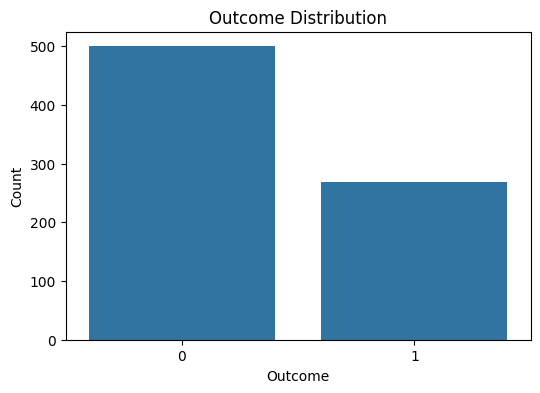

In [11]:
# Visualize Class Distributation For Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [12]:
# Segregate Numerical and Categorical Column
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']
categorical_columns = [column for column in df.columns if column != 'Loan_Status' and df[column].dtype == 'object']

In [13]:
numerical_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [14]:
categorical_columns

[]

#### EDA For Numerical Columns

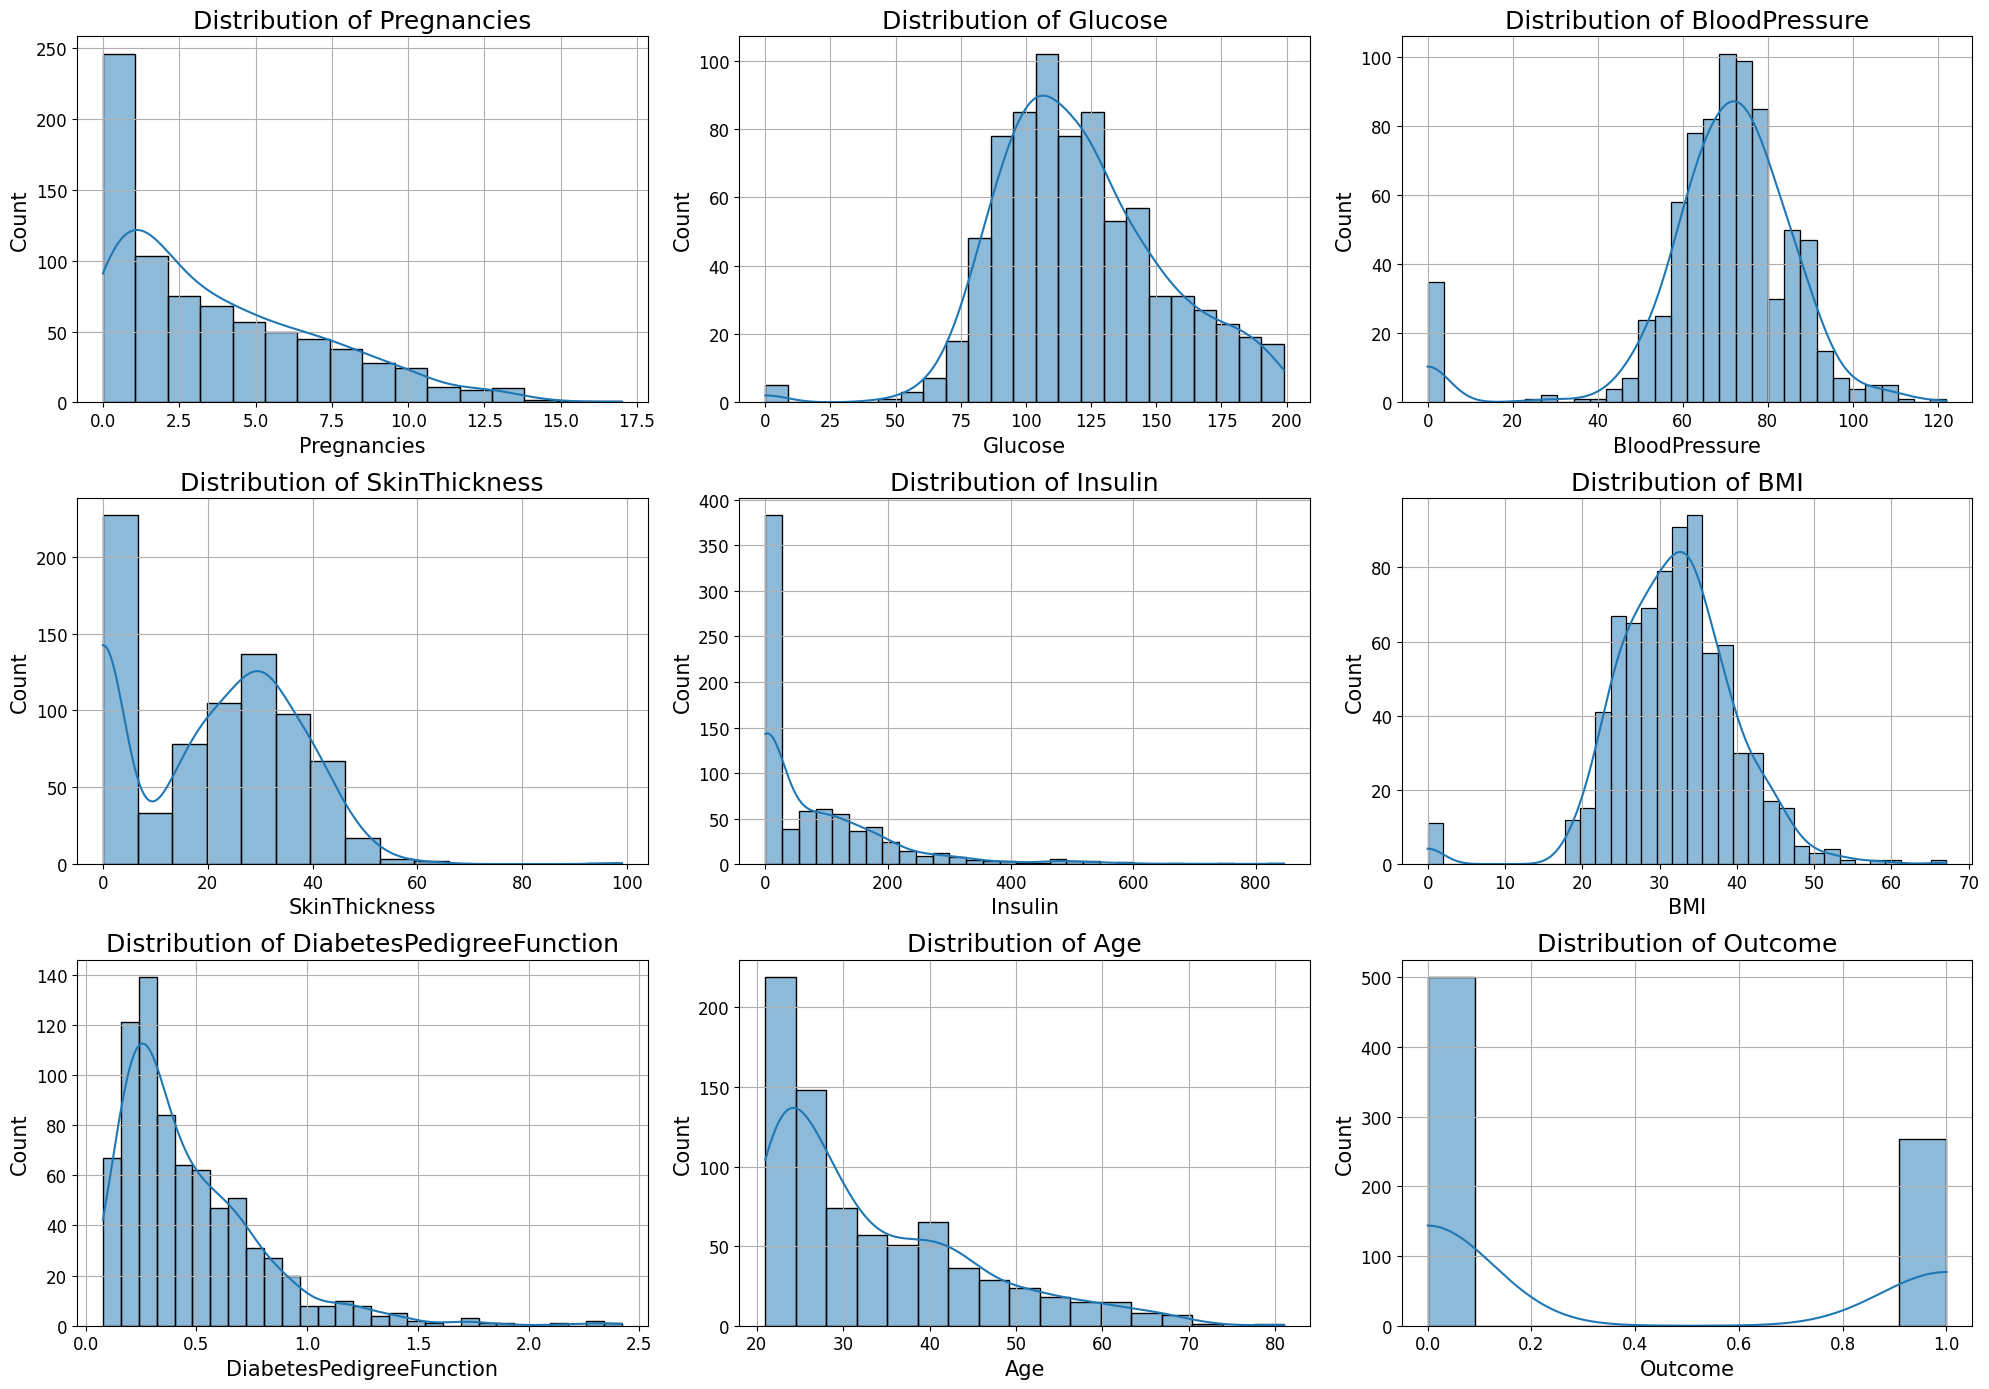

In [21]:
# Plot Histogram to show the distribution of the numerical data
plt.figure(figsize=(20,14))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    plt.grid(True)
    sns.histplot(data=df,x=column, kde=True, fill=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f'{column}', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'Distribution of {column}', fontsize=18)

plt.tight_layout()
plt.show()


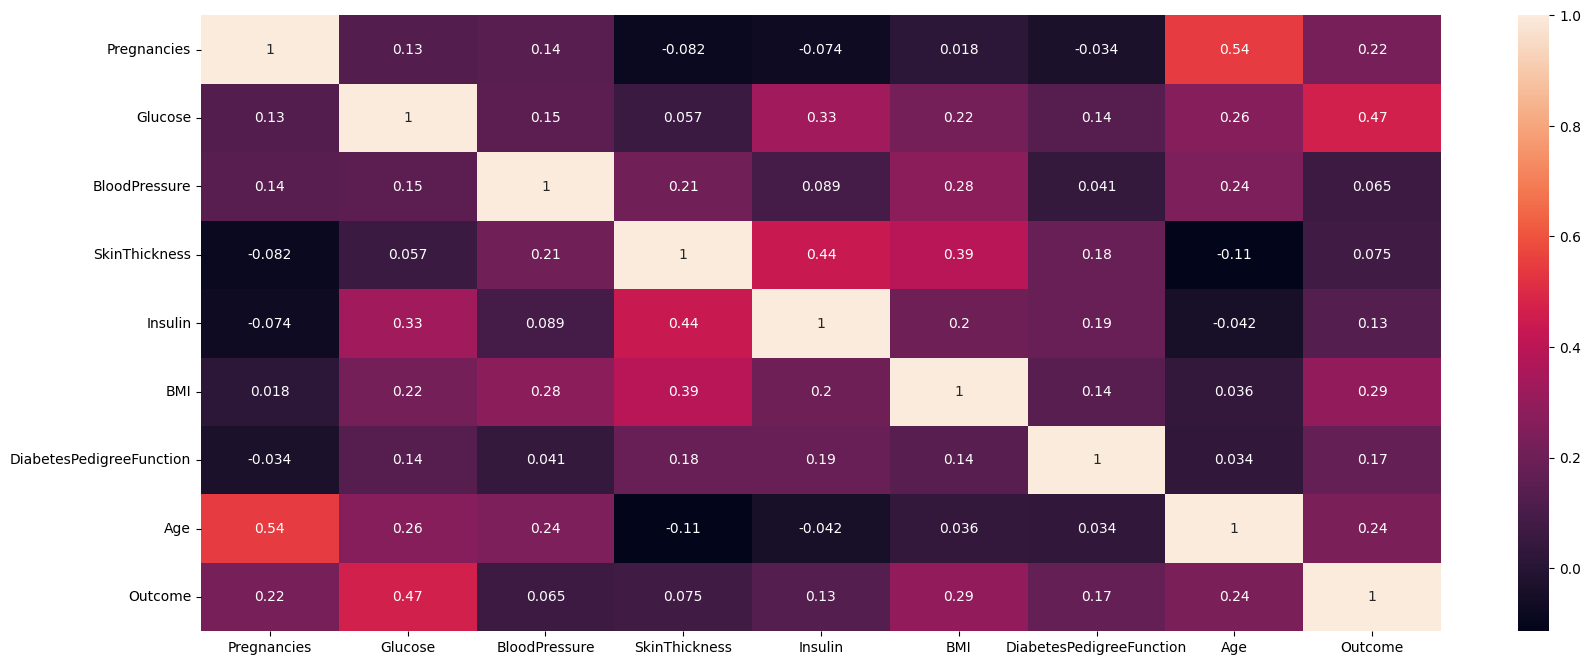

In [18]:
# Now we will find the relationship within the numerical feature using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.show()

<Figure size 2000x800 with 0 Axes>

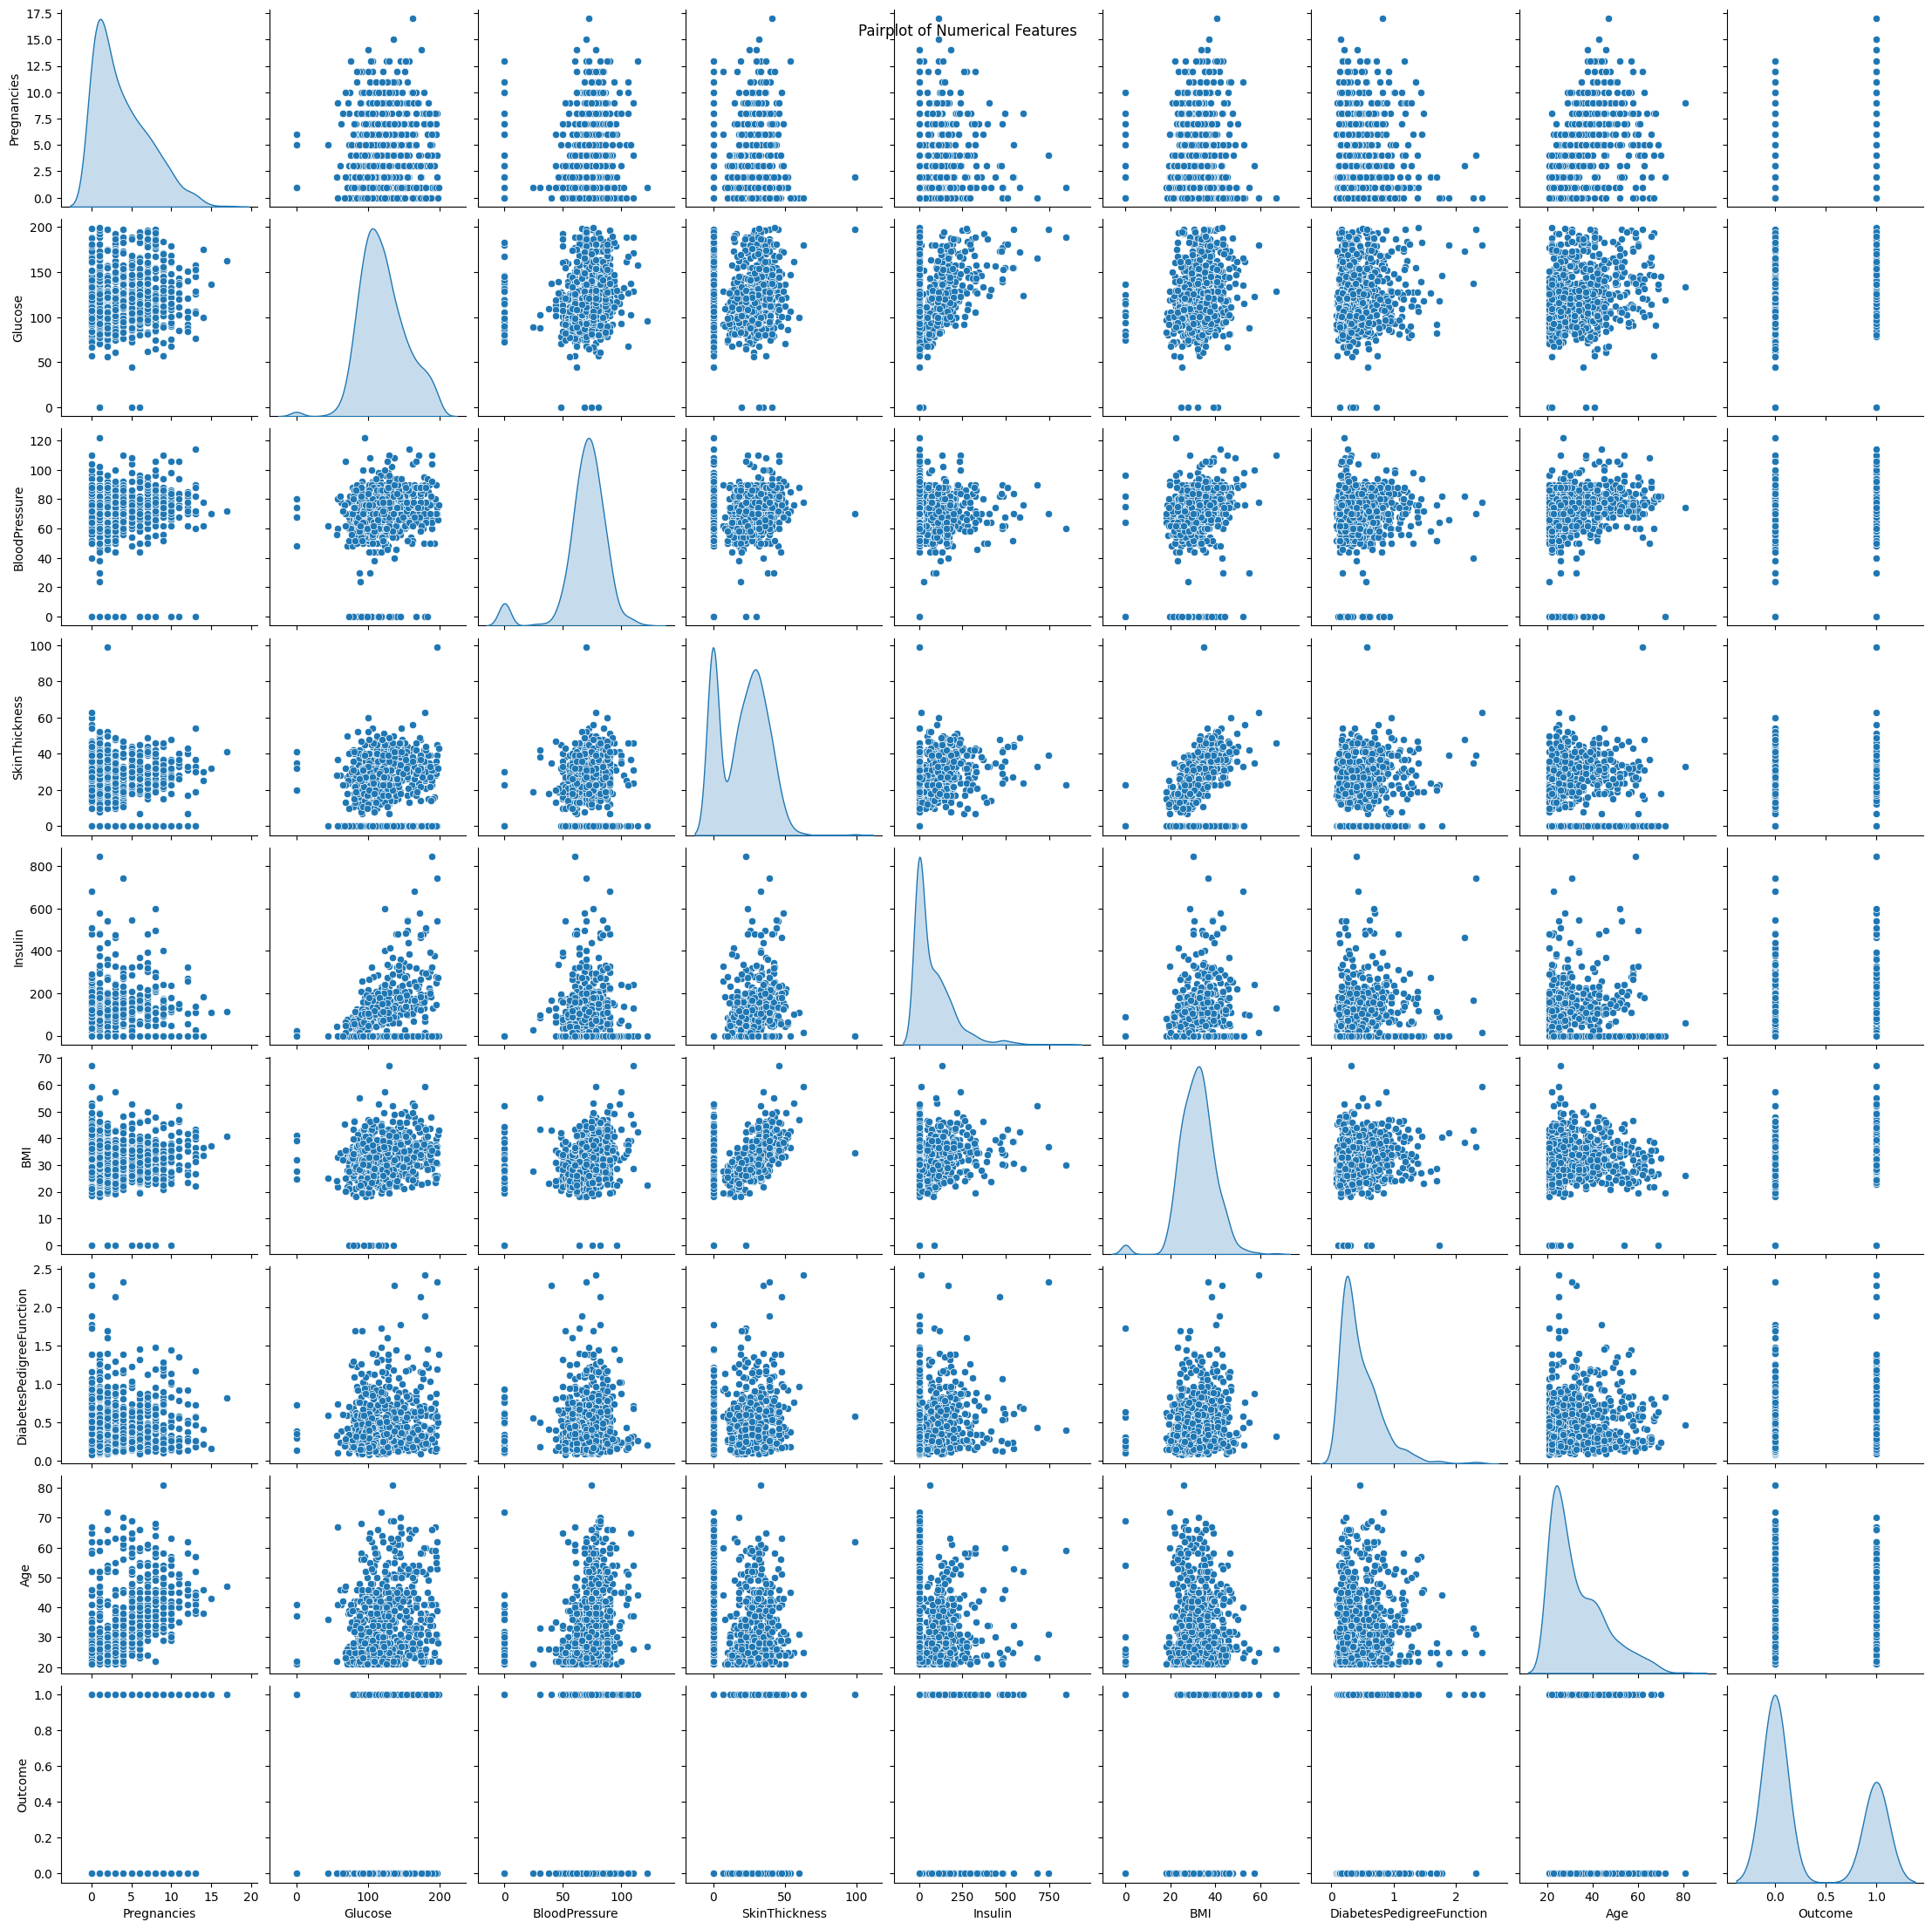

In [19]:
# Pairplot to visualize pairwise relationship in numerical features
plt.figure(figsize=(20,8))
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

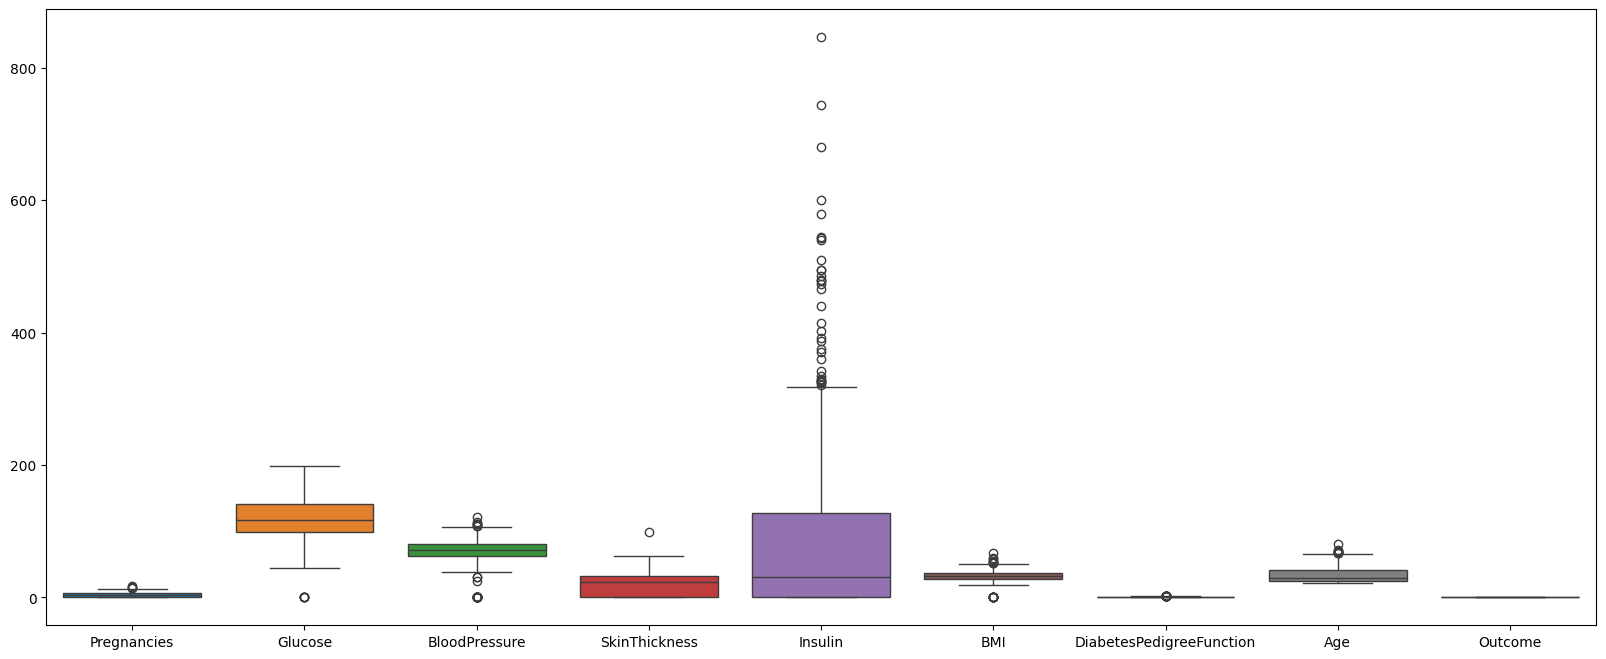

In [20]:
# Find the Outlier of the numerical data
plt.figure(figsize=(20,8))
sns.boxplot(df[numerical_columns])
plt.show()